In [4]:
from scipy.spatial.distance import cosine

import math
import numpy as np

with open("content/words.txt") as f:
    words = dict()
    expected_vector_dim = None  # To store the dimension of the first valid vector
    for line in f:
        row = line.split()
        word = row[0]
        try:
            vector = np.array([float(x) for x in row[1:]])
            if expected_vector_dim is None:
                expected_vector_dim = len(vector) # Set expected dimension from first vector

            if len(vector) == expected_vector_dim:
                words[word] = vector
            else:
                # Optionally, print a warning for inconsistent vector dimensions
                # print(f"Warning: Word '{word}' has inconsistent vector dimension ({len(vector)}), skipping.")
                pass
        except ValueError:
            # Handle cases where float conversion fails for a line
            # print(f"Warning: Could not parse vector for word '{word}', skipping.")
            pass


def distance(w1, w2):
    return cosine(w1, w2)


def closest_words(embedding):
    distances = {
        w: distance(embedding, words[w])
        for w in words
    }
    return sorted(distances, key=lambda w: distances[w])[:10]


def closest_word(embedding):
    return closest_words(embedding)[0]

In [5]:
words['king']

array([-0.460532, -0.122683,  0.125202, -0.187103,  0.289424,  0.213058,
        0.456965, -0.191533, -0.02698 ,  0.755271, -0.015301,  0.601037,
       -0.181943,  0.199305,  0.034763,  0.494065,  0.082579,  0.176537,
        0.206314, -0.248303, -0.025217,  0.415988,  0.19993 , -0.389385,
       -0.078753, -0.08874 , -0.013766,  0.016555,  0.108856,  0.194737,
       -0.299207,  0.749247, -0.029237, -0.048427, -0.330631,  0.407169,
       -0.079168, -0.093957,  0.480886,  0.077964, -0.088534,  0.713602,
       -0.118557, -0.270851, -0.140838, -0.131647,  0.295785,  0.302023,
        0.034249, -0.207171,  0.26443 , -0.083421, -0.032343, -0.220059,
       -0.318151,  0.205184,  0.067668,  0.161636,  0.27527 , -0.493875,
       -0.156276, -0.236065, -0.341645, -0.134388, -0.501494,  0.083939,
       -0.287321,  0.076375, -0.070097,  0.621787, -0.050258, -0.146837,
        0.596582, -0.380058,  0.214806, -0.084074, -0.172936,  0.101755,
        0.136072,  0.096491, -0.214064,  0.24683 , 

In [13]:
closest_word(words['king'] - words['man'] + words['woman'])

'queen'

In [14]:
closest_words(words['king'] - words['man'] + words['woman'])

['queen',
 'king',
 'empress',
 'prince',
 'duchess',
 'princess',
 'consort',
 'monarch',
 'dowager',
 'throne']

In [20]:
distance(words['man'], words['woman'])

np.float64(0.19634064728516087)

In [24]:
distance(words['dog'], words['cat'])

np.float64(0.13833064354236546)

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_words(word_list, title="Embedding das palavras"):
    # garante que todas existem no vocabulário
    missing = [w for w in word_list if w not in words]
    if missing:
        raise ValueError(f"Palavras ausentes do vocabulário: {missing}")

    embeddings = np.vstack([words[w] for w in word_list])
    reduced = PCA(n_components=2, random_state=0).fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], c="tab:blue")

    for word, (x, y) in zip(word_list, reduced):
        plt.annotate(word, (x, y), textcoords="offset points", xytext=(4, 4))

    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()


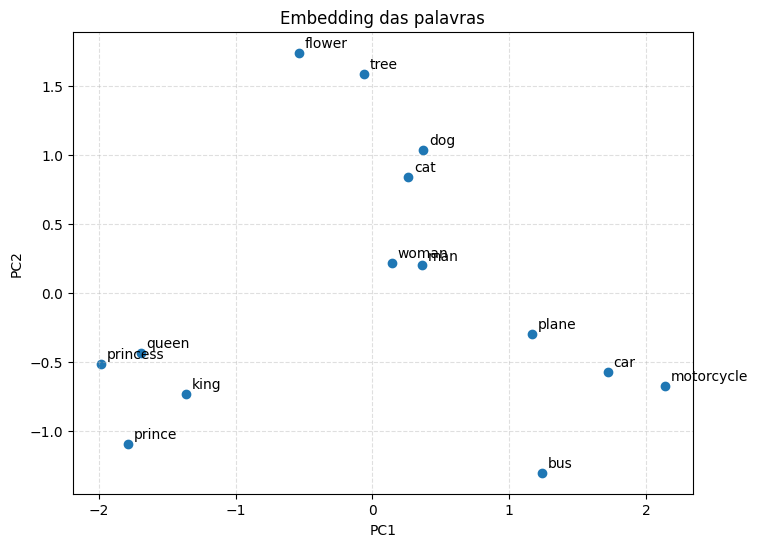

In [37]:
plot_words(["king", "queen", "man", "woman", "prince", "princess", "dog", "cat", "flower", "tree", "car", "bus", "motorcycle", "plane"])

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # aciona suporte 3D

def plot_words_3d(word_list, title="Embedding 3D das palavras"):
    missing = [w for w in word_list if w not in words]
    if missing:
        raise ValueError(f"Palavras ausentes do vocabulário: {missing}")

    embeddings = np.vstack([words[w] for w in word_list])
    reduced = PCA(n_components=3, random_state=0).fit_transform(embeddings)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c="tab:blue")

    for word, (x, y, z) in zip(word_list, reduced):
        ax.text(x, y, z, word)

    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.tight_layout()
    plt.show()


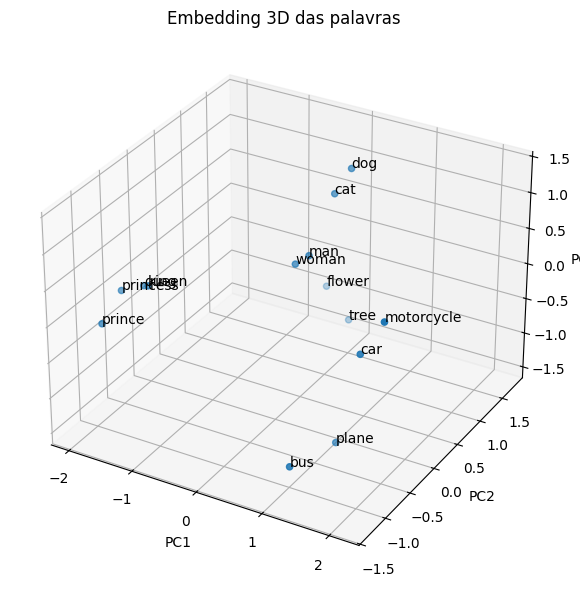

In [38]:
plot_words_3d(["king", "queen", "man", "woman", "prince", "princess", "dog", "cat", "flower", "tree", "car", "bus", "motorcycle", "plane"])